In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 正解データ生成
def makeLabels(X, x1=0.35, y1=0.35, r1=0.3, x2=0.65, y2=0.65, r2=0.3):
    # 円1：中心 (0.35, 0.35), 半径 0.3 の円
    # 円2：中心 (0.65, 0.65), 半径 0.3 の円
    # 円1 と 円2 どちらかに（のみ）入っているならば 1、そうでなければ 0
    chk1 = np.less_equal(np.linalg.norm(X - np.array([x1, y1]), axis=1), r1)
    chk2 = np.less_equal(np.linalg.norm(X - np.array([x2, y2]), axis=1), r2)
    return np.where(np.logical_xor(chk1, chk2), 1.0, 0.0)

In [3]:
# サンプルデータ（訓練データ）生成
def makeData(N=1000):
    data = np.random.rand(N, 2)
    labels = makeLabels(data)
    return np.hstack([data, labels.reshape((N, 1))])

In [4]:
N = 10000
data = makeData(N=N)

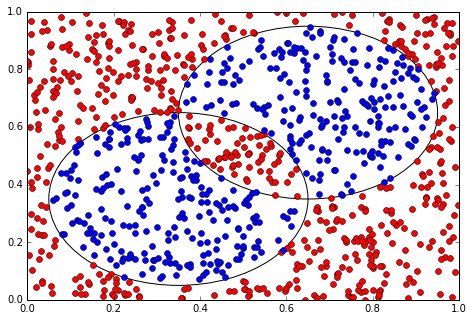

In [5]:
subdata = data[0:1000, :]
data0 = subdata[subdata[:,2]==0]
data1 = subdata[subdata[:,2]==1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
c1 = plt.Circle((0.35, 0.35), 0.3, fill=False)
c2 = plt.Circle((0.65, 0.65), 0.3, fill=False)
ax.add_patch(c1)
ax.add_patch(c2)
plt.plot(data0[:,0], data0[:,1], "ro")
plt.plot(data1[:,0], data1[:,1], "bo")

## TensorFlow

In [6]:
def makeXMat(X0):
    N = np.size(X0, 0)
    X = X0 * 2.0 - 1.0
    return np.hstack((X, X**2, np.product(X, axis=1).reshape(N, 1)))

In [7]:
X = makeXMat(data[:,0:2]); Y = data[:, 2]

In [8]:
import tensorflow as tf

In [9]:
# 訓練データ：長さ5のベクトルデータ
x = tf.placeholder(tf.float32, [None, 5])
# 正解データ：0 or 1 のスカラー値
d = tf.placeholder(tf.float32, (None, 1))

In [10]:
W1 = tf.Variable(tf.random_uniform([5, 4], -1.0, 1.0))
b1 = tf.Variable(tf.random_uniform([4], -1.0, 1.0))
z1 = tf.nn.tanh(tf.matmul(x,  W1) + b1)

In [11]:
W2 = tf.Variable(tf.random_uniform([4, 6], -1.0, 1.0))
b2 = tf.Variable(tf.random_uniform([6], -1.0, 1.0))
z2 = tf.nn.tanh(tf.matmul(z1, W2) + b2)

In [12]:
W3 = tf.Variable(tf.random_uniform([6, 4], -1.0, 1.0))
b3 = tf.Variable(tf.random_uniform([4], -1.0, 1.0))
z3 = tf.nn.sigmoid(tf.matmul(z2, W3) + b3)

In [13]:
W4 = tf.Variable(tf.random_uniform([4, 1], -1.0, 1.0))
b4 = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
z4 = tf.matmul(z3, W4) + b4

In [14]:
y = tf.nn.sigmoid(z4)

In [15]:
x_entropy = tf.nn.sigmoid_cross_entropy_with_logits(z4, d)

In [16]:
optimizer = tf.train.GradientDescentOptimizer(0.03)
# optimizer = tf.train.AdagradOptimizer(0.1)
train_step = optimizer.minimize(x_entropy)

In [17]:
init = tf.initialize_all_variables()

In [18]:
# y（＝学習結果の出力）と d（正解データ）で一致しているかどうかを確認
correct_prediction = tf.equal(tf.round(y), d)
# 平均（＝一致している個数÷全データ数）を計算
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
sess = tf.Session()
sess.run(init)
# ↑実際にはここで始めて各変数が初期化される

In [20]:
batch_size = 100
for i in range(1, 5001):
    randidx = np.random.choice(range(N), batch_size, replace=False)
    batch_xs = X[randidx, :]
    batch_ys = np.reshape(Y[randidx], (batch_size, 1))
    # _x = np.random.rand(100, 2)
    # batch_xs = makeXMat(_x)
    # batch_ys = np.reshape(makeLabels(_x), (batch_size, 1))
    sess.run(train_step, feed_dict={x: batch_xs, d: batch_ys})
    if i % 100 == 0:
        print(sess.run(accuracy, feed_dict={x: X, d: Y.reshape(N, 1)}))

0.885
0.8653
0.8957
0.8846
0.9004
0.7264
0.8327
0.9205
0.9261
0.9605
0.8902
0.943
0.9469
0.9352
0.9596
0.9663
0.9167
0.9557
0.9602
0.9639
0.9606
0.9818
0.9502
0.9301
0.9718
0.9756
0.9501
0.9655
0.9745
0.9768
0.9835
0.9588
0.9748
0.9736
0.9647
0.9822
0.9782
0.9756
0.9805
0.9878
0.9829
0.9825
0.9851
0.9705
0.9647
0.9788
0.9877
0.9643
0.9876
0.9843


In [22]:
Yd = np.reshape(sess.run(y, feed_dict={x: X, d: Y.reshape(N, 1)}), (N,))

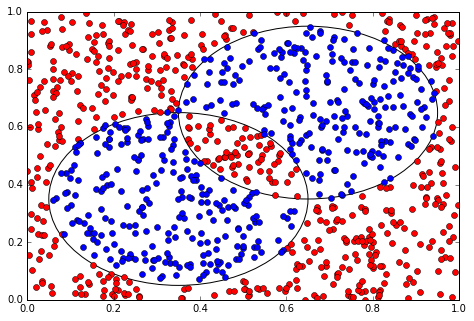

In [23]:
subdata = data[0:1000, :]
subYd = Yd[0:1000]
data0 = subdata[subYd<0.5]
data1 = subdata[subYd>=0.5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
c1 = plt.Circle((0.35, 0.35), 0.3, fill=False)
c2 = plt.Circle((0.65, 0.65), 0.3, fill=False)
ax.add_patch(c1)
ax.add_patch(c2)
plt.plot(data0[:,0], data0[:,1], "ro")
plt.plot(data1[:,0], data1[:,1], "bo")

In [24]:
tp = np.sum(Y[Yd>=0.5])
fp = np.sum(1-Y[Yd>=0.5])
tn = np.sum(1-Y[Yd<0.5])
fn = np.sum(Y[Yd<0.5])
np.array([[tp,fp],[fn,tn]])

array([[ 4609.,   119.],
       [   38.,  5234.]])

In [25]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print("accuracy: %.06f" % accuracy)

accuracy: 0.984300


In [26]:
precision = tp / (tp + fp)
print("precision: %.06f" % precision)

precision: 0.974831


In [27]:
recall = tp / (tp + fn)
print("recall: %.06f" % recall)

recall: 0.991823


In [28]:
f_measure = 2 * precision * recall / (precision + recall)
print("f_measure: %.06f" % f_measure)

f_measure: 0.983253


In [29]:
H = lambda _x: sess.run(tf.reshape(tf.round(y), [-1]), feed_dict={x: makeXMat(_x)})

In [30]:
x_test = np.random.rand(100, 2)
y_test = H(x_test)

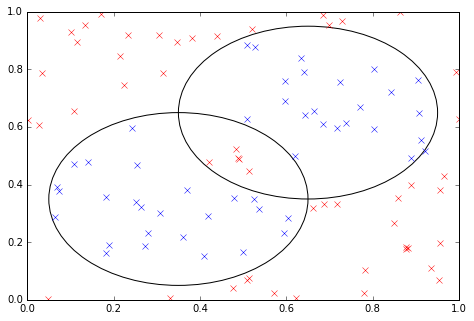

In [31]:
data0 = x_test[y_test==0]
data1 = x_test[y_test==1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
c1 = plt.Circle((0.35, 0.35), 0.3, fill=False)
c2 = plt.Circle((0.65, 0.65), 0.3, fill=False)
ax.add_patch(c1)
ax.add_patch(c2)
plt.plot(data0[:,0], data0[:,1], "rx")
plt.plot(data1[:,0], data1[:,1], "bx")

In [32]:
labels = makeLabels(x_test)
tp = np.sum(labels[y_test==1])
fp = np.sum(1-labels[y_test==1])
tn = np.sum(1-labels[y_test==0])
fn = np.sum(labels[y_test==0])
np.array([[tp,fp],[fn,tn]])

array([[ 47.,   1.],
       [  0.,  52.]])

In [33]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
print("accuracy: %.06f" % accuracy)

accuracy: 0.990000


In [34]:
precision = tp / (tp + fp)
print("precision: %.06f" % precision)

precision: 0.979167


In [35]:
recall = tp / (tp + fn)
print("recall: %.06f" % recall)

recall: 1.000000


In [36]:
f_measure = 2 * precision * recall / (precision + recall)
print("f_measure: %.06f" % f_measure)

f_measure: 0.989474
